Import

In [31]:
from libsvm.svmutil import *
import numpy as np
import random
from matplotlib import pyplot as plt

9

In [29]:
Clist = [0.1, 1, 10]
Qlist = [2, 3, 4]
minimun = 65535
c_minimun = 0
q_minimun = 0
for q in Qlist:
    for c in Clist:
        train_y , train_x = svm_read_problem("satimage.scale.txt")



        for i in range(len(train_y)):
            if train_y[i] != 4:
                train_y[i] = -1
            else:
                train_y[i] = 1
        
    p = svm_problem(train_y , train_x)
    sentence = svm_parameter(f"-t 1 -c {c} -d {q} -r 1 -g 1")

    model = svm_train(p ,sentence)
    SV = model.get_SV()
    if len(SV) < minimun:
        minimun = len(SV)
        c_minimun = c
        q_minimun = q

print("4 versus not 4" ,", C : ",c_minimun,", Q : ", q_minimun, "number of support vectors : ",minimun)

4 versus not 4 , C :  10 , Q :  4 number of support vectors :  629


10

In [30]:
train_y , train_x = svm_read_problem("satimage.scale.txt")
test_y , test_x = svm_read_problem("satimage.scale.t")

for i in range(len(train_y)):
    if train_y[i] != 1:
        train_y[i] = -1
    else:
        train_y[i] = 1
    if i < len(test_y):
        if test_y[i] != 1:
            test_y[i] = -1
        else:
            test_y[i] = 1

C = [0.01 , 0.1 , 1 , 10 , 100]
for c in C:
    p = svm_problem(train_y , train_x)
    model = svm_train(p , f"-t 2 -c {c} -r 1 -g 1")
    p_labs, p_acc, p_vals = svm_predict(test_y, test_x, model)

    print(c , " E_out"," : " , 100-p_acc[0])

Accuracy = 95.4% (1908/2000) (classification)
0.01  E_out  :  4.6000000000000085
Accuracy = 98.8% (1976/2000) (classification)
0.1  E_out  :  1.2000000000000028
Accuracy = 99.5% (1990/2000) (classification)
1  E_out  :  0.5
Accuracy = 99.4% (1988/2000) (classification)
10  E_out  :  0.5999999999999943
Accuracy = 99.45% (1989/2000) (classification)
100  E_out  :  0.5499999999999972


11

Accuracy = 97% (194/200) (classification)
Accuracy = 97.5% (195/200) (classification)
Accuracy = 99.5% (199/200) (classification)
Accuracy = 99% (198/200) (classification)
Accuracy = 98.5% (197/200) (classification)
c = 1
Accuracy = 97% (194/200) (classification)
Accuracy = 99% (198/200) (classification)
Accuracy = 99.5% (199/200) (classification)
Accuracy = 100% (200/200) (classification)
Accuracy = 100% (200/200) (classification)
c = 10
Accuracy = 95% (190/200) (classification)
Accuracy = 98.5% (197/200) (classification)
Accuracy = 98.5% (197/200) (classification)
Accuracy = 100% (200/200) (classification)
Accuracy = 100% (200/200) (classification)
c = 10
Accuracy = 97.5% (195/200) (classification)
Accuracy = 100% (200/200) (classification)
Accuracy = 100% (200/200) (classification)
Accuracy = 100% (200/200) (classification)
Accuracy = 100% (200/200) (classification)
c = 0.1
Accuracy = 94% (188/200) (classification)
Accuracy = 98% (196/200) (classification)
Accuracy = 99% (198/200) (

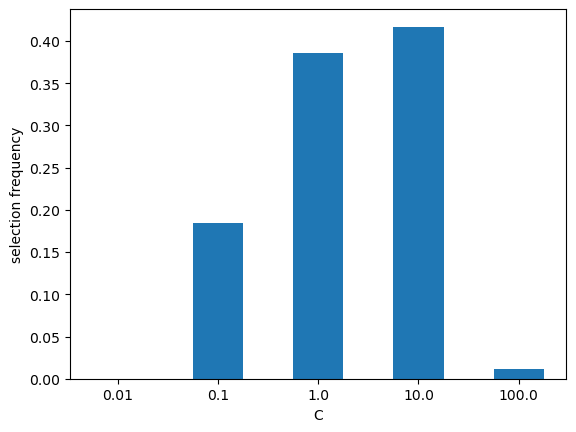

In [52]:
C = [0.01, 0.1, 1, 10, 100]
C_count = [0, 0, 0, 0, 0]


for a in range(1000):
    acc_max = 0
    c_min = 1000
    data = []

    with open("satimage.scale.txt", "r") as f:
      data = f.readlines()

    random.seed(1126+a)
    random.shuffle(data)

    with open("satimage.scale2.txt","w") as f:
      for d in data:
        f.write(d)

    y, x = svm_read_problem("satimage.scale2.txt")

    for i in range(len(y)):
      if y[i] != 1:
        y[i] = -1
      else:
        y[i] = 1

    train_x = x[200:]
    train_y = y[200:]
    valid_x = x[:200]
    valid_y = y[:200]

    for c in C:
        p = svm_problem(train_y, train_x)
        sentence = svm_parameter(f'-t 2 -c {c} -r 1 -g 1')
        model = svm_train(p, sentence)
        p_labs, p_acc, p_vals = svm_predict(valid_y, valid_x, model)


        if p_acc[0]/100 >= acc_max:
          if p_acc[0]/100 == acc_max and c < c_min:
            c_min = c
          elif p_acc[0]/100 == acc_max and c > c_min:
            continue
          else:
            acc_max = p_acc[0]/100
            c_min = c

    C_count[C.index(c_min)] += 1
    print(f"c = {c_min}")


print(f"numbers of C = [0.01, 0.1, 1, 10, 100] : {C_count}")
plt.bar(np.arange(len(C)), np.array(C_count)/1000, width = 0.5, tick_label=C)
plt.xlabel("C")
plt.ylabel("selection frequency")
plt.show()

1530
Accuracy = 93.7091% (4156/4435) (classification)
Accuracy = 95.35% (1907/2000) (classification)
941
Accuracy = 95.8512% (4251/4435) (classification)
Accuracy = 95.85% (1917/2000) (classification)
808
Accuracy = 97.5197% (4325/4435) (classification)
Accuracy = 96.4% (1928/2000) (classification)
757
Accuracy = 99.0981% (4395/4435) (classification)
Accuracy = 95.95% (1919/2000) (classification)
748
Accuracy = 100% (4435/4435) (classification)
Accuracy = 95.45% (1909/2000) (classification)
[17.591375503037987, 46.4458723194913, 87.4856176980916, 102.58834218938105, 159.00656294579625]


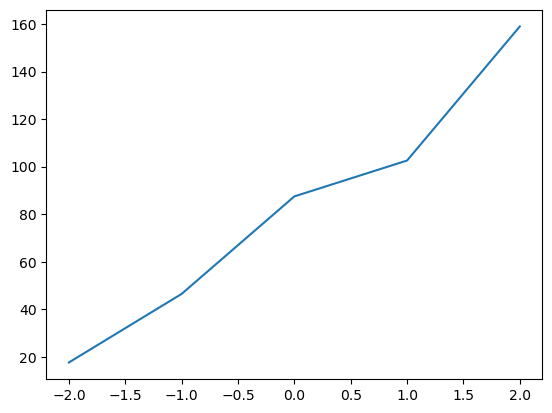

In [51]:
C = [0.01, 0.1, 1, 10, 100]
W = []


for i in range(len(C)):
    train_y, train_x = svm_read_problem('satimage.scale.txt')

    for k in range(len(train_y)):
      if train_y[k] != 3:
        train_y[k] = -1
      else:
        train_y[k] = 1

    p = svm_problem(train_y, train_x)
    sentence = svm_parameter(f'-t 2 -c {C[i]} -r 1 -g 1')
    model = svm_train(p, sentence)
    support_vector_coefs = [i[0] for i in model.get_sv_coef()]
    sv = model.get_SV()
    Wn = np.zeros(36)
    for n in range(len(sv)):
      coef = support_vector_coefs[n]
      SV = []
      for k in range(36):
        if k+1 in sv[n]:
          SV.append(sv[n][k+1])
        else:
          SV.append(0)
      Wn += np.array(SV) * coef

    print(len(support_vector_coefs))
    p_label, p_acc, p_val = svm_predict(train_y, train_x, model)
    test_y, test_x = svm_read_problem('satimage.scale.t')
    for k in range(len(test_y)):
      if test_y[k] != 3:
        test_y[k] = -1
      else:
        test_y[k] = 1
    p_labs, p_acc, p_vals = svm_predict(test_y, test_x, model)

    W.append(np.linalg.norm(np.array(Wn)))

print(W)
plt.plot(np.log10(C), W)
plt.show()